# Fat Cheese

The data this week comes from cheese.com via Tidy Tuesday.

Cheese is nutritious food made mostly from the milk of cows but also other mammals, including sheep, goats, buffalo, reindeer, camels and yaks. Around 4000 years ago people have started to breed animals and process their milk. That's when the cheese was born.

248 cheeses have listed fat content. Is there a relationship between fat content and cheese type? What about texture, flavor, or aroma?

In [315]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.io as pio
pio.renderers.default = 'notebook'
import plotly.express as px
import seaborn as sns


# Load the data
cheeses = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-06-04/cheeses.csv')

## Explore the data

In [316]:
# Poke about
cheeses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cheese           1187 non-null   object
 1   url              1187 non-null   object
 2   milk             1151 non-null   object
 3   country          1176 non-null   object
 4   region           855 non-null    object
 5   family           489 non-null    object
 6   type             1174 non-null   object
 7   fat_content      248 non-null    object
 8   calcium_content  25 non-null     object
 9   texture          1129 non-null   object
 10  rind             945 non-null    object
 11  color            1045 non-null   object
 12  flavor           1089 non-null   object
 13  aroma            929 non-null    object
 14  vegetarian       748 non-null    object
 15  vegan            748 non-null    object
 16  synonyms         294 non-null    object
 17  alt_spellings    109 non-null    

In [317]:
cheeses.head()

,cheese,url,milk,country,region,family,type,fat_content,calcium_content,texture,rind,color,flavor,aroma,vegetarian,vegan,synonyms,alt_spellings,producers
0,Aarewasser,https://www.cheese.com/aarewasser/,cow,Switzerland,NaN,NaN,semi-soft,NaN,NaN,buttery,washed,yellow,sweet,buttery,False,False,NaN,NaN,Jumi
1,Abbaye de Belloc,https://www.cheese.com/abbaye-de-belloc/,sheep,France,Pays Basque,NaN,"semi-hard, artisan",NaN,NaN,"creamy, dense, firm",natural,yellow,burnt caramel,lanoline,True,False,Abbaye Notre-Dame de Belloc,NaN,NaN
2,Abbaye de Belval,https://www.cheese.com/abbaye-de-belval/,cow,France,NaN,NaN,semi-hard,40-46%,NaN,elastic,washed,ivory,NaN,aromatic,False,False,NaN,NaN,NaN
3,Abbaye de Citeaux,https://www.cheese.com/abbaye-de-citeaux/,cow,France,Burgundy,NaN,"semi-soft, artisan, brined",NaN,NaN,"creamy, dense, smooth",washed,white,"acidic, milky, smooth","barnyardy, earthy",False,False,NaN,NaN,NaN
4,Abbaye de Tamié,https://www.cheese.com/tamie/,cow,France,Savoie,NaN,"soft, artisan",NaN,NaN,"creamy, open, smooth",washed,white,"fruity, nutty","perfumed, pungent",False,False,NaN,"Tamié, Trappiste de Tamie, Abbey of Tamie",NaN


In [318]:
interesting_cols = ['milk', 'country', 'type', 'fat_content','texture','rind','color','flavor']

# Generate and print the frequency of each interesting column
frequencies = {col: cheeses[col].value_counts() for col in interesting_cols}
for col, freq in frequencies.items():
    print(f"{col} frequency:\n{freq}\n")

milk frequency:
cow                                696
goat                               195
sheep                              128
cow, goat                           25
cow, goat, sheep                    21
goat, sheep                         21
cow, sheep                          21
water buffalo                       14
plant-based                          6
buffalo, cow                         5
buffalo                              4
cow, water buffalo                   3
cow, goat, water buffalo             2
yak                                  2
cow, goat, sheep, water buffalo      2
camel                                1
cow, yak                             1
buffalo, cow, sheep                  1
moose                                1
donkey                               1
goat, yak                            1
Name: milk, dtype: int64

country frequency:
United States                 305
France                        169
Italy                         141
Canada            

In [319]:
cheeses['country'].unique()

array(['Switzerland', 'France', 'England, Great Britain, United Kingdom',
       'Czech Republic', 'United States', 'Italy',
       'Cyprus, Egypt, Israel, Jordan, Lebanon, Middle East, Syria',
       'United Kingdom', 'Sweden', 'Canada', 'Spain', 'Netherlands',
       'Scotland, United Kingdom', 'New Zealand', 'Germany', 'Australia',
       'Austria', 'Portugal', 'India', 'Cyprus', 'Mexico', 'Scotland',
       'Greece', 'Ireland', nan, 'Armenia', 'Finland', 'Iceland',
       'Lebanon, Middle East', 'Hungary', 'England', 'Middle East',
       'Belgium', 'England, United Kingdom',
       'Canada, Denmark, France, Germany, Netherlands, United States',
       'Turkey', 'Wales', 'Canada, United States', 'Denmark',
       'Canada, Italy',
       'Denmark, Finland, Germany, Iceland, Norway, Sweden',
       'Hungary, Poland, Slovakia', 'Romania', 'Italy, United States',
       'Austria, Germany', 'Mongolia', 'United Kingdom, Wales', 'Brazil',
       'Mauritania', 'England, Scotland, Wales', '

## Cleaning
There's a fair amount of cleaning that could take place. Given our question, I'm going to reduce the dataset down to the cheeses that have a fat content listed. There are too many rows missing this value to replace them with an average or mode etc. 

In [320]:
fat_cheese = cheeses.copy()
fat_cheese = fat_cheese[fat_cheese['fat_content'].notna()]
fat_cheese.head()

,cheese,url,milk,country,region,family,type,fat_content,calcium_content,texture,rind,color,flavor,aroma,vegetarian,vegan,synonyms,alt_spellings,producers
2,Abbaye de Belval,https://www.cheese.com/abbaye-de-belval/,cow,France,NaN,NaN,semi-hard,40-46%,NaN,elastic,washed,ivory,NaN,aromatic,False,False,NaN,NaN,NaN
6,Abbaye du Mont des Cats,https://www.cheese.com/abbaye-du-mont-des-cats/,cow,France,Nord-Pas-de-Calais,NaN,"semi-soft, artisan, brined",50%,NaN,"smooth, supple",washed,pale yellow,"milky, salty",floral,False,False,NaN,NaN,Abbaye du Mont des Cats
8,Abertam,https://www.cheese.com/abertam/,sheep,Czech Republic,Karlovy Vary,NaN,"hard, artisan",45%,NaN,firm,natural,pale yellow,"acidic, strong, tangy",NaN,False,False,NaN,NaN,NaN
13,Acorn,https://www.cheese.com/acorn/,sheep,United Kingdom,Bethania,NaN,"hard, artisan",52%,NaN,"crumbly, firm",NaN,NaN,"burnt caramel, citrusy, herbaceous",fruity,True,False,NaN,NaN,NaN
14,Adelost,https://www.cheese.com/adelost/,cow,Sweden,NaN,Blue,"semi-soft, blue-veined",50%,NaN,creamy,natural,blue,"salty, sharp, tangy",strong,NaN,NaN,NaN,NaN,NaN


In [321]:
fat_cheese.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 2 to 1186
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cheese           248 non-null    object
 1   url              248 non-null    object
 2   milk             242 non-null    object
 3   country          247 non-null    object
 4   region           196 non-null    object
 5   family           83 non-null     object
 6   type             247 non-null    object
 7   fat_content      248 non-null    object
 8   calcium_content  24 non-null     object
 9   texture          231 non-null    object
 10  rind             208 non-null    object
 11  color            223 non-null    object
 12  flavor           236 non-null    object
 13  aroma            187 non-null    object
 14  vegetarian       174 non-null    object
 15  vegan            174 non-null    object
 16  synonyms         76 non-null     object
 17  alt_spellings    42 non-null     o

In [322]:
# Deal with milk
null_milk = fat_cheese[fat_cheese['milk'].isnull()]
null_milk

,cheese,url,milk,country,region,family,type,fat_content,calcium_content,texture,rind,color,flavor,aroma,vegetarian,vegan,synonyms,alt_spellings,producers
64,Amsterdammer (British Columbia),https://www.cheese.com/amsterdammer-british-co...,NaN,Canada,"Comox Valley, Vancouver Island",NaN,"semi-soft, firm",30%,NaN,"buttery, creamy",natural,pale yellow,"buttery, creamy","aromatic, buttery",False,False,NaN,NaN,Natural Pastures Cheese Company
564,L'Empereur,https://www.cheese.com/lempereur/,NaN,Canada,Quebec,NaN,"soft, artisan",15%,NaN,"creamy, supple",washed,cream,"buttery, salty","fruity, milky, nutty",NaN,NaN,"Empereur allégé, L’Empereur Léger",NaN,Fromagerie Fritz Kaiser
566,L'Étoile de St-Raymond,https://www.cheese.com/letoile-de-st-raymond/,NaN,Canada,Quebec,NaN,soft,35%,NaN,"buttery, creamy",ash coated,ivory,"buttery, grassy, milky",mushroom,NaN,NaN,NaN,L’Étoile De Saint-Raymond,La Maison Alexis de Portneuf Inc.
630,Le Reflet de Portneuf,https://www.cheese.com/le-reflet-de-portneuf/,NaN,Canada,Quebec,NaN,soft,30%,NaN,"buttery, creamy",washed,cream,"buttery, creamy, mushroomy",NaN,NaN,NaN,NaN,NaN,La Maison Alexis de Portneuf Inc.
631,Le St-Raymond,https://www.cheese.com/le-st-raymond/,NaN,Canada,Quebec,NaN,soft,20%,NaN,"smooth, supple",washed,ivory,"fruity, nutty, woody",NaN,NaN,NaN,NaN,Le Saint-Raymond,La Maison Alexis de Portneuf Inc.
980,Prima Donna forte,https://www.cheese.com/prima-donna-forte/,NaN,Netherlands,NaN,Parmesan,hard,33 g/100g,990 mg/100g,"crumbly, crystalline, flaky, grainy",natural,yellow,"nutty, strong, sweet",NaN,NaN,NaN,NaN,NaN,Vandersterre Groep International B.V.


I'm going to leave this column for now. It's not numeric and there are only a few null values. 

In [323]:
# Deal with country
null_country = fat_cheese[fat_cheese['country'].isnull()]
null_country

,cheese,url,milk,country,region,family,type,fat_content,calcium_content,texture,rind,color,flavor,aroma,vegetarian,vegan,synonyms,alt_spellings,producers
1143,St Tola Divine,https://www.cheese.com/st-tola-divine/,goat,NaN,"Inagh, Co Clare",NaN,"fresh soft, artisan",14 g/100g,NaN,"creamy, soft, spreadable",rindless,white,"lemony, mild, milky","floral, mild, milky",False,False,NaN,NaN,Inagh Farmhouse Cheese Ltd


I have looked up the producer and they are in Ireland so I'm just going to change the country. 

In [324]:
fat_cheese.loc[:, 'country'] = fat_cheese['country'].apply(lambda x: 'Ireland' if pd.isna(x) else x)
fat_cheese['country'].isnull().sum()

0

In [325]:
countries = fat_cheese['country'].value_counts()
countries

France                                                          54
Canada                                                          32
United States                                                   15
Italy                                                           14
Australia                                                       14
Austria                                                         13
Germany                                                         10
Netherlands                                                      9
Sweden                                                           8
Ireland                                                          7
England                                                          5
England, United Kingdom                                          5
Portugal                                                         4
Spain                                                            4
Greece                                                        

There are a few instances, particularly in the UK, where there are multiple versions of the same country. I'm going to combine them so we get an accurate read. 

In [326]:
fat_cheese['country'] = fat_cheese['country'].str.replace('Great Britain,', '', regex=False).str.replace('United Kingdom,', '', regex=False).str.replace('United Kingdom', '', regex=False).str.replace('England,', 'England', regex=False).str.replace('Scotland,', 'Scotland', regex=False).str.strip()
fat_cheese['country'].value_counts()

France                                                          54
Canada                                                          32
United States                                                   15
England                                                         14
Australia                                                       14
Italy                                                           14
Austria                                                         13
Germany                                                         10
Netherlands                                                      9
Sweden                                                           8
Ireland                                                          7
Scotland                                                         4
Denmark                                                          4
Greece                                                           4
India                                                         

In [327]:
# Deal with type
null_type = fat_cheese[fat_cheese['type'].isnull()]
null_type

,cheese,url,milk,country,region,family,type,fat_content,calcium_content,texture,rind,color,flavor,aroma,vegetarian,vegan,synonyms,alt_spellings,producers
839,Paesanella Buffalo Mozzarella,https://www.cheese.com/paesanella-buffalo-mozz...,"buffalo, cow",Australia,New South Wales,Mozzarella,NaN,25.8 g/100g,NaN,NaN,rindless,white,NaN,NaN,True,False,Bufala Mozzarella,NaN,Paesanella Cheese Manufacturers


In [328]:
# See if similar cheeses have a type listed that we can substitute
buffa = fat_cheese[fat_cheese['milk'].str.contains('buffalo', na=False, case=False)]
buffa

,cheese,url,milk,country,region,family,type,fat_content,calcium_content,texture,rind,color,flavor,aroma,vegetarian,vegan,synonyms,alt_spellings,producers
69,Amul Processed Cheese,https://www.cheese.com/amul-processed-cheese/,"cow, water buffalo",India,Gujarat,Cheddar,"hard, processed",26%,343 mg/100g,"crumbly, dense",artificial,yellow,"buttery, creamy, salty",NaN,True,False,NaN,NaN,Gujarat Cooperative Milk Marketing Federation ...
816,Mozzarella (Australian),https://www.cheese.com/mozzarella-australian/,"cow, water buffalo",Australia,NaN,Pasta filata,"semi-soft, brined",45%,NaN,"springy, stringy, supple",rindless,white,milky,"fresh, milky",True,False,NaN,Australian Mozzarella,NaN
817,Mozzarella di Bufala DOP,https://www.cheese.com/mozzarella-di-bufala/,water buffalo,Italy,"Campania, Paestum, Foggia",Pasta filata,"soft, brined",21%,NaN,"creamy, smooth, springy",NaN,white,"floral, mild, milky, sour",fresh,False,False,"Buffalo mozzarella, Mozzarella di Bufala Campana",NaN,Casa Madaio
839,Paesanella Buffalo Mozzarella,https://www.cheese.com/paesanella-buffalo-mozz...,"buffalo, cow",Australia,New South Wales,Mozzarella,NaN,25.8 g/100g,NaN,NaN,rindless,white,NaN,NaN,True,False,Bufala Mozzarella,NaN,Paesanella Cheese Manufacturers
852,Paneer,https://www.cheese.com/paneer/,"cow, water buffalo","Bangladesh, India",NaN,Cottage,fresh firm,20.8 g/100g,208 mg/100g,"crumbly, firm",rindless,white,milky,"fresh, milky",True,False,"Chhena, Chhana",NaN,NaN
992,Provoleta,https://www.cheese.com/provoleta/,water buffalo,Argentina,NaN,Pasta filata,"semi-hard, artisan",45%,316 mg/100g,"creamy, smooth, springy",NaN,pale yellow,"mild, smokey",fresh,False,False,Spinning Argentine provolone cheese,NaN,NaN


I'll change the type to "semi-soft, brined" as per the other Australian buffalo mozzarella. 

In [329]:
fat_cheese.loc[:, 'type'] = fat_cheese['type'].apply(lambda x: 'semi-soft, brined' if pd.isna(x) else x)
fat_cheese['type'].isnull().sum()

0

In [330]:
# Deal with fat_content
fat_cheese['fat_content'].unique()

array(['40-46%', '50%', '45%', '52%', '12%', '14%', '55%', '34%', '48%',
       '33.5 g/100g', '40-50%', '45-60%', '30%', '46%', '30-40%', '26%',
       '8%', '20%', '54.23 g/100g', '25%', '34-48%', '40-45%', '32%',
       '43%', '28.5%', '22%', '28%', '25.22 g/100g', '20-30%', '25.5%',
       '43.3 g/100g', '62%', '70%', '15-25%', '39.6 g/100g',
       '32.5 g/100g', '11%', '37%', '54%', '31%', '21%', '60%', '35%',
       '7 g/100g', '75%', '40%', '27 g/100g', '10%', '46-60%', '8 g/100g',
       '34.2 g/100g', '27%', '24%', '33%', '5 g/100g', '51%', '15%',
       '38%', '49-53%', '42%', '29.8%', '23%', '36-38%', '35-40%',
       '45-50%', '13%', '50-60%', '25.8 g/100g', '25.4 g/100g',
       '18.4 g/100g', '20.8 g/100g', '72.7%', '0 g/100g', '30.5 g/100g',
       '33 g/100g', '18.3 g/100g', '32.3 g/100g', '40.5%', '30-45%',
       '34.4%', '17%', '18.2 g/100g', '14 g/100g', '36 g/100g',
       '7.8 g/100g'], dtype=object)

There are a number of things we need to clean here:
1. Get rid of the "%" symbol.
2. Remove "g/100g".
3. Replace ranges with an average.
4. Make the values numeric and remove the decimal place.
5. Remove some spaces.

In [331]:
# Remove "%" and "g/100g"
fat_cheese['fat_content'] = fat_cheese['fat_content'].str.replace('%', '', regex=False).str.replace('g/100g', '', regex=False)

# Replace ranges with an average
def average_range(x):
    if '-' in x:
        low, high = map(int, x.split('-'))
        return (low + high) / 2
    return float(x) 

fat_cheese['fat_content'] = fat_cheese['fat_content'].apply(average_range)

In [332]:
# Make the values numeric and remove the decimal place.
fat_cheese['fat_content'] = fat_cheese['fat_content'].astype(str)
fat_cheese['fat_content'] = pd.to_numeric(fat_cheese['fat_content'])
fat_cheese['fat_content']

2       43.0
6       50.0
8       45.0
13      52.0
14      50.0
        ... 
1143    14.0
1145    36.0
1147    48.0
1182    45.0
1186     7.8
Name: fat_content, Length: 248, dtype: float64

In [333]:
# Remove the decimal place.
fat_cheese['fat_content'] = round(fat_cheese['fat_content'],0)
fat_cheese['fat_content'].unique()

array([43., 50., 45., 52., 12., 14., 55., 34., 48., 30., 46., 35., 26.,
        8., 20., 54., 25., 41., 42., 32., 28., 22., 62., 70., 40., 11.,
       37., 31., 21., 60.,  7., 75., 27., 10., 53., 24., 33.,  5., 51.,
       15., 38., 23., 13., 18., 73.,  0., 17., 36.])

In [334]:
# Explore unique values
unique_vals = {col: fat_cheese[col].unique() for col in interesting_cols}
for col, freq in unique_vals.items():
    print(f"{col} frequency:\n{freq}\n")

milk frequency:
['cow' 'sheep' 'goat' 'goat, sheep' nan 'cow, water buffalo' 'cow, goat'
 'cow, goat, sheep' 'cow, sheep' 'camel' 'moose' 'water buffalo'
 'buffalo, cow']

country frequency:
['France' 'Czech Republic' '' 'Sweden' 'Canada' 'Germany' 'Australia'
 'Austria' 'Italy' 'Portugal' 'India' 'Cyprus' 'Greece' 'England'
 'Ireland' 'United States' 'Lebanon, Middle East' 'Belgium'
 'Canada, Denmark, France, Germany, Netherlands, United States'
 'Netherlands' 'Scotland' 'Iceland'
 'Denmark, Finland, Germany, Iceland, Norway, Sweden' 'Spain'
 'Austria, Germany' 'Wales' 'Mauritania' 'Denmark' 'Switzerland' 'Hungary'
 'Great Britain' 'Israel' 'Lithuania' 'Belgium, Germany, Netherlands'
 'Canada, France' 'Serbia' 'Turkey' 'Brazil' 'Croatia' 'Bangladesh, India'
 'Poland' 'New Zealand' 'France, United States' 'Argentina'
 'England Scotland']

type frequency:
['semi-hard' 'semi-soft, artisan, brined' 'hard, artisan'
 'semi-soft, blue-veined' 'semi-soft' 'soft' 'semi-soft, smear-ripened'
 'h

In [335]:
# Re-run frequency tables
frequencies2 = {col: fat_cheese[col].value_counts() for col in interesting_cols}
for col, freq in frequencies2.items():
    print(f"{col} frequency:\n{freq}\n")

milk frequency:
cow                   158
goat                   29
sheep                  17
goat, sheep            12
cow, sheep              8
cow, goat               7
cow, water buffalo      3
cow, goat, sheep        3
water buffalo           2
camel                   1
moose                   1
buffalo, cow            1
Name: milk, dtype: int64

country frequency:
France                                                          54
Canada                                                          32
United States                                                   15
England                                                         14
Australia                                                       14
Italy                                                           14
Austria                                                         13
Germany                                                         10
Netherlands                                                      9
Sweden                  

In [336]:
fat_cheese[['milk','texture','rind','flavor','aroma','color']] = fat_cheese[['milk','texture','rind','flavor','aroma','color']].astype(str)
fat_cheese.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 2 to 1186
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cheese           248 non-null    object 
 1   url              248 non-null    object 
 2   milk             248 non-null    object 
 3   country          248 non-null    object 
 4   region           196 non-null    object 
 5   family           83 non-null     object 
 6   type             248 non-null    object 
 7   fat_content      248 non-null    float64
 8   calcium_content  24 non-null     object 
 9   texture          248 non-null    object 
 10  rind             248 non-null    object 
 11  color            248 non-null    object 
 12  flavor           248 non-null    object 
 13  aroma            248 non-null    object 
 14  vegetarian       174 non-null    object 
 15  vegan            174 non-null    object 
 16  synonyms         76 non-null     object 
 17  alt_spellings  

## Exploratory Data Analysis

(array([  3.,  17.,  17.,  30.,  39.,  23., 101.,   8.,   7.,   3.]),
 array([ 0. ,  7.5, 15. , 22.5, 30. , 37.5, 45. , 52.5, 60. , 67.5, 75. ]),
 <BarContainer object of 10 artists>)

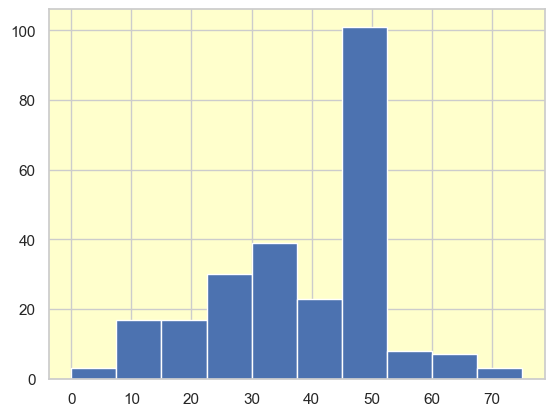

In [337]:
# Let's look at the distribution of fat content broadly.  
plt.hist(fat_cheese['fat_content'])

It's nearly a normal distribution except 50% fat content is very common. 

In [338]:
# Examine the top rankings of fat content by cheese
fattiest_cheeses = fat_cheese[['cheese','country','fat_content']].sort_values(by='fat_content',ascending=False)[:25]
fattiest_cheeses

,cheese,country,fat_content
281,Brillat-Savarin,France,75.0
965,Port-Salut,France,73.0
171,Belletoile,France,70.0
150,Bavarian Bergkase,Germany,62.0
254,Boursin,France,60.0
550,CréMonté,Germany,60.0
378,Caprice des Dieux,France,60.0
1010,Saint Agur,France,60.0
791,Montsalvat,Germany,60.0
866,Pave d'Affinois,France,60.0


In [339]:
# Fix the country of Acorn cheese
fat_cheese.loc[13, 'country'] = 'Wales'

In [340]:
fattiest_cheeses = fat_cheese[['cheese','country','fat_content']].sort_values(by='fat_content',ascending=False)[:25]

In [341]:
fattiest_cheese_country = round(fattiest_cheeses['country'].value_counts(normalize=True)*100,0)
fattiest_cheese_country_df = pd.DataFrame(fattiest_cheese_country)
fattiest_cheese_country_df = fattiest_cheese_country_df.reset_index()
fattiest_cheese_country_df.columns = ['country','perc_fattiest_cheeses']

In [342]:
# Check the spread of cheese by country
cheese_origin = round(fat_cheese['country'].value_counts(normalize=True)*100,0)
cheese_origin

France                                                          22.0
Canada                                                          13.0
United States                                                    6.0
England                                                          6.0
Australia                                                        6.0
Italy                                                            6.0
Austria                                                          5.0
Germany                                                          4.0
Netherlands                                                      4.0
Sweden                                                           3.0
Ireland                                                          3.0
Denmark                                                          2.0
Scotland                                                         2.0
Greece                                                           2.0
India                             

Interestingly, France overindexes on the fattiest cheeses. Of the top 25 highest fat containing cheeses, France has around a third but overall it has around 20% of the cheese. Germany is also a fattier cheese country with 16% of the fattiest cheeses but only 4% of the cheeses overall. 

In [ ]:
# Plot this on a world map
fig = px.choropleth(fattiest_cheese_country_df,
                    locations="country",  # This column should have ISO 3166-1 alpha-3 country codes
                    color="perc_fattiest_cheeses",  # Column containing the values you want to color
                    hover_name="country",  # Column to add to hover information
                    locationmode='country names',
                    color_continuous_scale=px.colors.sequential.Plasma)  # Color scale

# Show the figure
fig.show()

In [ ]:
cheese_origin_df = pd.DataFrame(cheese_origin)
cheese_origin_df = cheese_origin_df.reset_index()
cheese_origin_df.columns = ['country', 'num_of_cheeses']
cheese_origin_df = cheese_origin_df[:21]
cheese_origin_df

,country,num_of_cheeses
0,France,22.0
1,Canada,13.0
2,United States,6.0
3,England,6.0
4,Australia,6.0
5,Italy,6.0
6,Austria,5.0
7,Germany,4.0
8,Netherlands,4.0
9,Sweden,3.0


In [ ]:
# Plot this on a world map
fig = px.choropleth(cheese_origin_df,
                    locations="country",  # This column should have ISO 3166-1 alpha-3 country codes
                    color="num_of_cheeses",  # Column containing the values you want to color
                    hover_name="country",  # Column to add to hover information
                    locationmode='country names',
                    color_continuous_scale=px.colors.sequential.Plasma)  # Color scale

# Show the figure
fig.show()

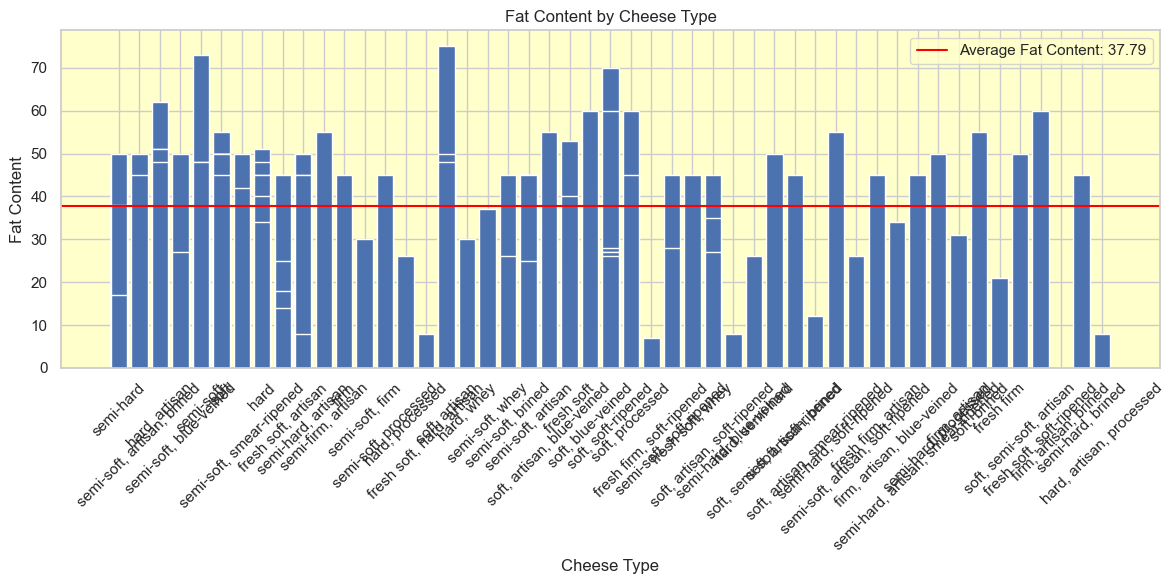

In [346]:
# Look at fat content vs different attributes
average_fat_content = fat_cheese['fat_content'].mean()

plt.figure(figsize=(12, 6))  
plt.bar(fat_cheese['type'], fat_cheese['fat_content'])
plt.xlabel('Cheese Type')
plt.ylabel('Fat Content')
plt.title('Fat Content by Cheese Type')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.axhline(y=average_fat_content, color='red', label=f'Average Fat Content: {average_fat_content:.2f}')
plt.legend()
plt.show()

There are too many types of cheese to deal with to understand the relationship between type and fat content. I'm going to simplify the types down to fresh soft, soft, semi-soft, semi-hard and hard. Given they are in increasing order of hardness we can even make them numeric and run a correlation. 

In [347]:
conditions = [
    fat_cheese['type'].str.contains('fresh soft', na=False),
    fat_cheese['type'].str.contains('semi-soft', na=False),
    fat_cheese['type'].str.contains('soft', na=False),
    fat_cheese['type'].str.contains('semi-hard', na=False),
    fat_cheese['type'].str.contains('hard', na=False)
]

choices = [1, 2, 3, 4, 5]

# Apply conditions and choices to the new column
fat_cheese['red_type'] = np.select(conditions, choices, default=0)
fat_cheese['red_type']

2       4
6       2
8       5
13      5
14      2
       ..
1143    1
1145    5
1147    5
1182    4
1186    5
Name: red_type, Length: 248, dtype: int64

In [348]:
fat_cheese['red_type'].value_counts()

3    78
2    54
5    46
4    44
1    17
0     9
Name: red_type, dtype: int64

In [349]:
corrs = fat_cheese[['red_type','fat_content']].corr()
corrs

,red_type,fat_content
red_type,1.000000,0.113982
fat_content,0.113982,1.000000


There's a weak positive correlation. I'll plot it to see how it looks. 

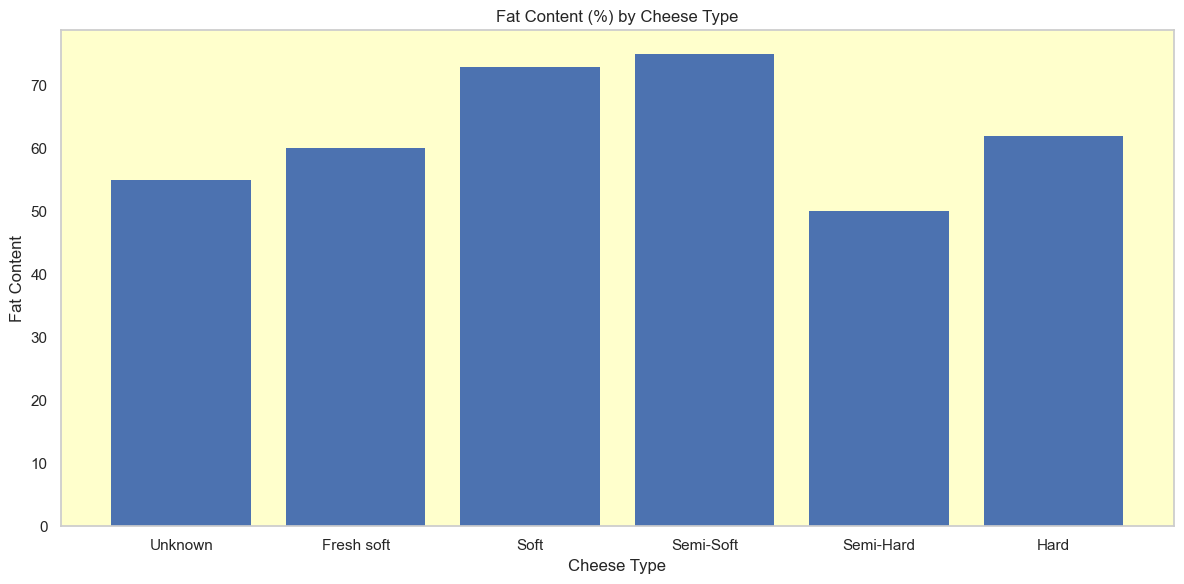

In [350]:
average_fat_content = fat_cheese['fat_content'].mean()

labels = ['Unknown', 'Fresh soft', 'Soft', 'Semi-Soft', 'Semi-Hard', 'Hard']
unique_types = np.unique(fat_cheese['red_type'])

plt.figure(figsize=(12, 6))  
bars = plt.bar(fat_cheese['red_type'], fat_cheese['fat_content'], edgecolor='none')
plt.xlabel('Cheese Type')
plt.ylabel('Fat Content')
plt.title('Fat Content (%) by Cheese Type')
plt.xticks(unique_types,labels)  
plt.tight_layout()

plt.grid(False)

plt.show()

Softer cheeses seem to have higher fat content. This is less so with fresh soft cheeses which are on par with hard cheeses. Reading into cheese-making a little, it would appear that this makes sense. Soft cheeses are often made with a higher fat content, it gives them the creaminess and unctuous texture. Hard cheeses have less and are more crumbly and sharp as a result. 

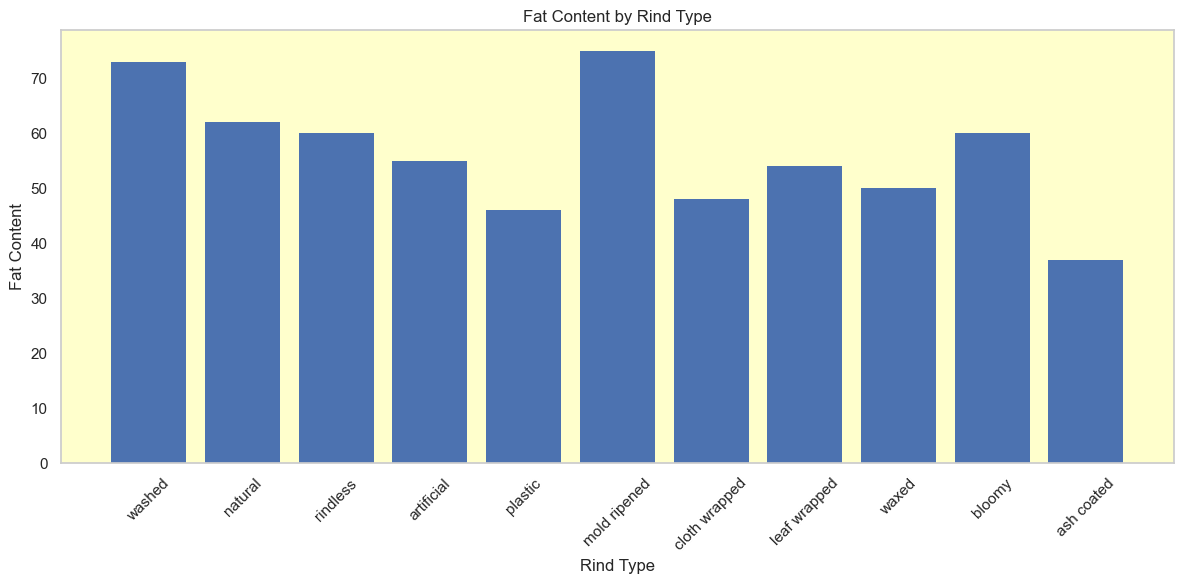

In [360]:
rind_nan_free = fat_cheese[fat_cheese['rind']!='nan']

plt.figure(figsize=(12, 6))  
plt.bar(rind_nan_free['rind'], rind_nan_free['fat_content'], edgecolor='none')
plt.xlabel('Rind Type')
plt.ylabel('Fat Content')
plt.title('Fat Content by Rind Type')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.grid(False)
plt.show()

Mold ripened and washed rind cheeses appear to have the highest fat content. Given these are typically classed as soft or semi-soft, this result fits with our previous finding around these types of cheeses.  

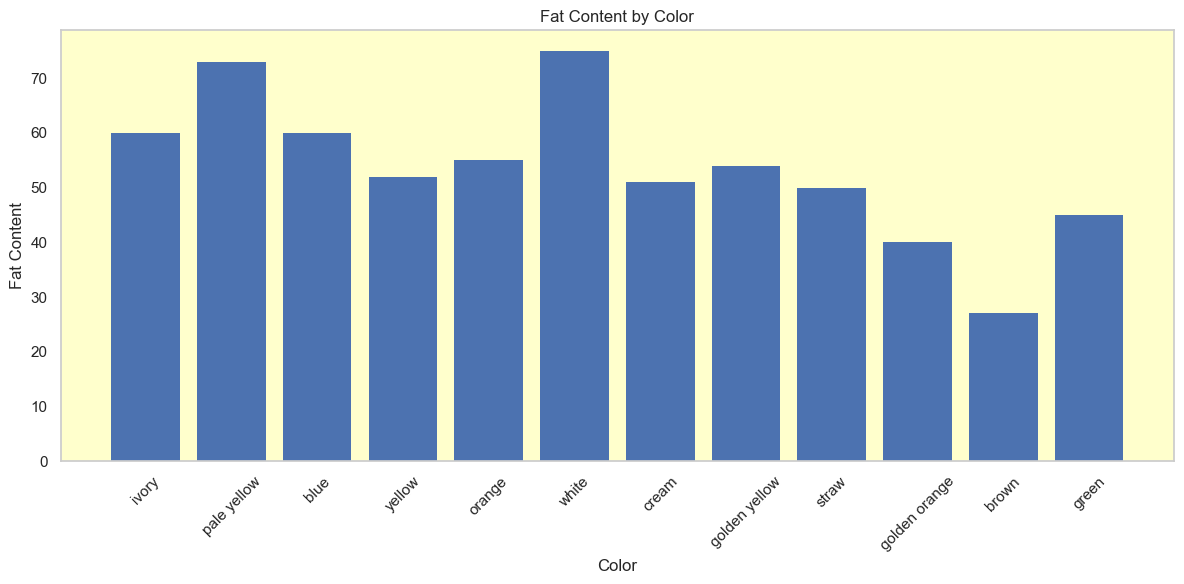

In [367]:
color_nan_free = fat_cheese[fat_cheese['color']!='nan']

plt.figure(figsize=(12, 6))  
plt.bar(color_nan_free['color'], color_nan_free['fat_content'], edgecolor='none')
plt.xlabel('Color')
plt.ylabel('Fat Content')
plt.title('Fat Content by Color')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.grid(False)
plt.show()

Cheese that is a paler colour like white, pale yellow and ivory appears to have a higher fat content, blue cheese (which is typically pale around the blue mould sections) also has a higher fat content.

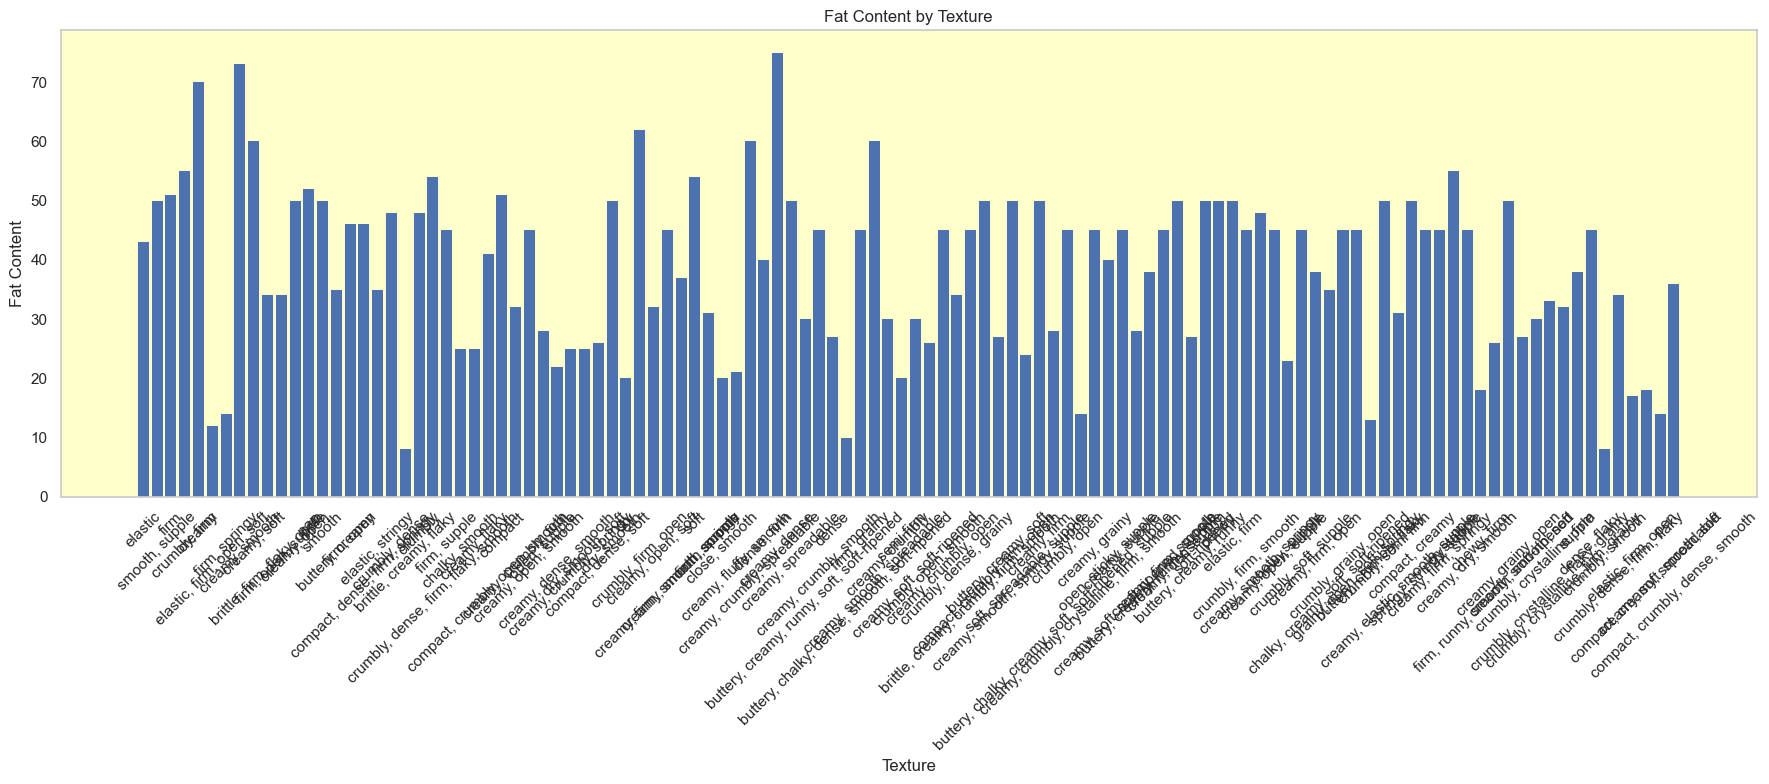

In [377]:
plt.figure(figsize=(18, 8))  
plt.bar(fat_cheese['texture'], fat_cheese['fat_content'],edgecolor='none')
plt.xlabel('Texture')
plt.ylabel('Fat Content')
plt.title('Fat Content by Texture')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.grid(False)
plt.show()

The textural descriptors are so diverse and abundant that it is hard to draw any relationship. 

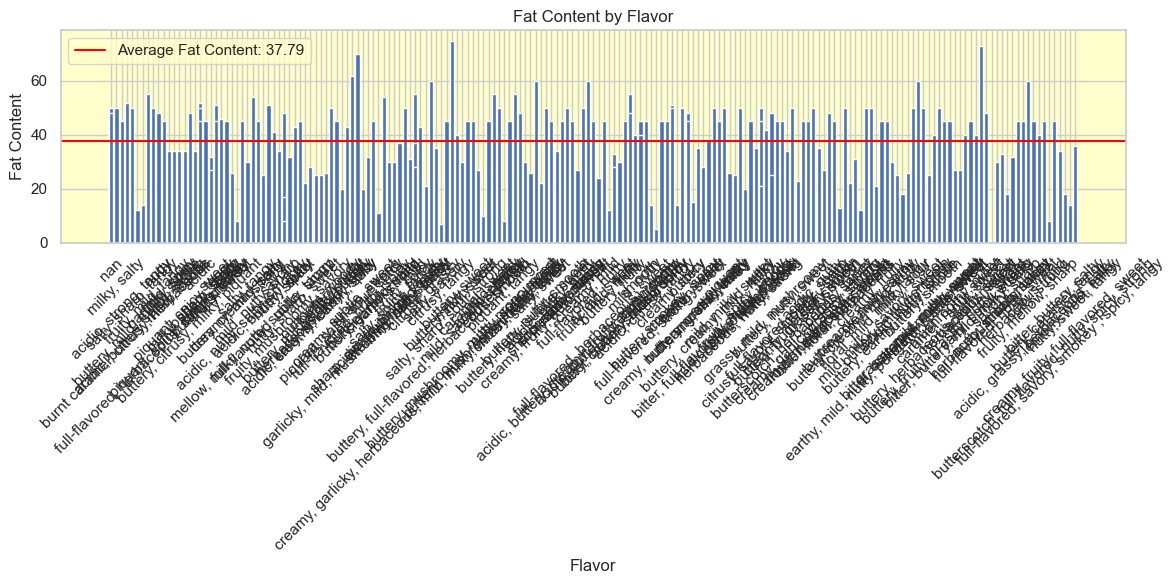

In [368]:
plt.figure(figsize=(12, 6))  
plt.bar(fat_cheese['flavor'], fat_cheese['fat_content'])
plt.xlabel('Flavor')
plt.ylabel('Fat Content')
plt.title('Fat Content by Flavor')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.axhline(y=average_fat_content, color='red', label=f'Average Fat Content: {average_fat_content:.2f}')
plt.legend()
plt.show()

It's a similar story for flavour as it was for texture, too many descriptors to be able to pull it apart. It starts getting very subjective. 

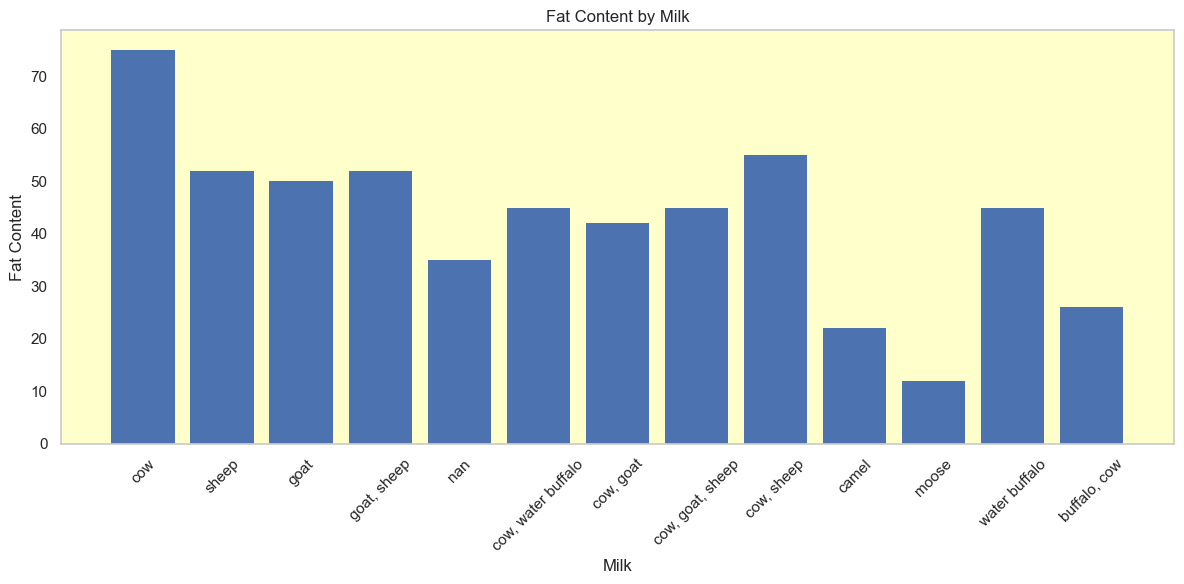

In [371]:
plt.figure(figsize=(12, 6))  
plt.bar(fat_cheese['milk'], fat_cheese['fat_content'],edgecolor='none')
plt.xlabel('Milk')
plt.ylabel('Fat Content')
plt.title('Fat Content by Milk')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.grid(False)
plt.show()

It looks like cow's milk only cheeses have the highest fat content but it's not a simple relationship. Where cow and other animal milks are mixed, the fat content is often lower than that of the other animal by itself. This doesn't feel like a reliable relationship to draw on.  

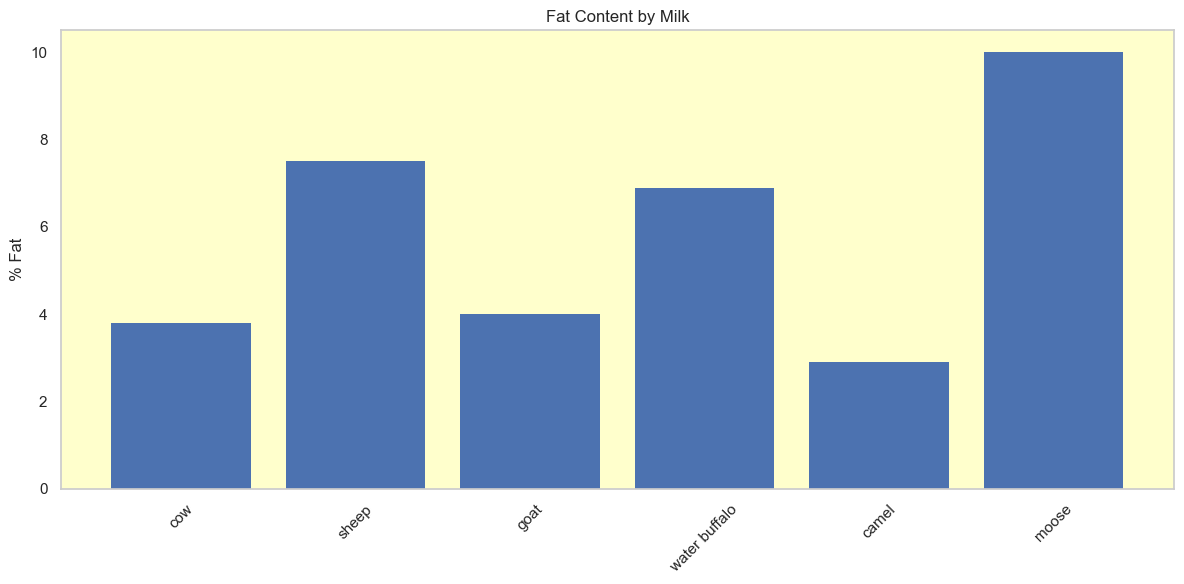

In [375]:
# Check this against total fat content in raw animal milks
milk_fat = pd.DataFrame({'animal':['cow', 'sheep', 'goat', 'water buffalo','camel','moose'],
                        '% fat': [3.8, 7.5, 4, 6.9, 2.9, 10]})
plt.figure(figsize=(12, 6))  
plt.bar(milk_fat['animal'], milk_fat['% fat'],edgecolor='none')
plt.ylabel('% Fat')
plt.title('Fat Content by Milk')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.grid(False)
plt.show()

# Source for data: McGee, H. (2004). On food and cooking: The science and lore of the kitchen. Scribner.

This breakdown of % fat by animal hasn't shed any light on the finding, rather it made it more confusing as cow's milk has the second lowest fat content. It could be that the types of animals used to make the milk for the various cheeses are quite particualr in their fat content (this is very possible). What is also likely is that the cheese-making techniques used for different cheeses are what contribute to the final fat content. 

## Conclusions
Of the attributes we could wrangle efficiently, the hardness of the cheese had the clearest relationship with the fat content of the cheese. The softer, but not fresh, cheeses had the higher fat content. Pale colour and mould rinds also seemed to indicate higher fat content. France and Germany dominate in the fattiest cheeses with those two countries accounting for more than half of the top 25 most fatty cheeses. 